<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/proyecto_articulo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MICROSIMULACIÓN

Los ingresos considerados son:


| Concepto      | Min   | Max   | Frecuencia | Distribución |
|---------------|-------|-------|------------|--------------|
| Renta         | 3480  | 3480  | Mensual    | Constante    |
| Aportaciones  | 100   | 300   | Semanal    | Normal       |
| Semana        | 50    | 120   | Semanal    | Normal       |
| Beca          | 6600  | 6600  | Semestral  | Binomial     |
| Rendimiento   | 13    | 14.5  | Anual      | Normal       |


Los gastos considerados son:


| Concepto   | Min   | Max   | Frecuencia | Distribución |
|------------|-------|-------|------------|--------------|
| Pasaje     | 22    | 42    | Diario     | Binomial     |
| Celular    | 269   | 299   | Mensual    | Binomial     |
| Comida     | 36    | 120   | Diario     | Normal       |
| Tdc        | 0     | 500   | Mensual    | Normal       |
| Otros      | 0     | 500   | Mensual    | Normal       |


In [ ]:
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import truncnorm
import seaborn as sns

In [ ]:
def dist_normal(mu, sigma, a, b, size):
    return truncnorm.rvs((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma, size=size)

In [ ]:
# FUNCION GENERADORA DE NUMERO ALEATORIOS CON DISTRIBUCIÓN NORMAL
def dist_normal2(mu, sigma, a, b, size):
    return np.clip(np.random.normal(mu, sigma, size), a, b)

In [ ]:
# SIMULAR VARIABLES
# Genera un vector con 1000 numeros aleatorrios normales
# Simula 1000 veces cada fila y guarda el promedio
def sim_var(mu,sigma,a,b):
  lista=[]
  for j in range(1000):
    arreglo=dist_normal2(mu=mu, sigma=sigma, a=a, b=b, size=1000)
    promedio=np.mean(arreglo)
    lista.append(promedio)
  return lista

In [ ]:
# RECOPILA PERCENTILES MAYORES AL INDICADO EN "per"
def percentiles_mas(arreglo, per):
  arreglo = np.array(arreglo)
  q = np.percentile(arreglo, per)
  valores_q_mas = arreglo[arreglo >= q]
  return valores_q_mas

In [ ]:
# RECOPILA PERCENTILES MENORES AL INDICADO EN "per"
def percentiles_menos(arreglo, per):
  arreglo = np.array(arreglo)
  q = np.percentile(arreglo, per)
  valores_q_mas = arreglo[arreglo <= q]
  return valores_q_mas

In [ ]:
# VARIABLES ESCENARIO BASE
aportaciones_sim=sim_var(150, 500, 100, 300)
aporte_sem_sim=sim_var(110, 500, 100, 120)
rendimiento_sim=sim_var(13, 10, 12, 15)
beca=np.random.choice([0, 6600], size=1000, p=[0.1, 0.9])
renta=np.full(1000,3480)
servicio=np.full(1000,1500)

comida_sim = sim_var(78, 50, 36, 120)
tarjeta_credito_sim = sim_var(400, 500, 300, 500)
otros_sim = sim_var(1500, 500, 700, 2000)
pasaje=np.random.choice([22, 42], size=1000, p=[0.1, 0.9])
celular=np.random.choice([269, 299], size=1000, p=[0.9, 0.1])
contador=np.full(1000,350)
emergencia=np.full(1000,0)

eb_var=pd.DataFrame({'aportaciones': aportaciones_sim, 'ap_sem':aporte_sem_sim, 'rendimiento':rendimiento_sim, 'beca':beca, 'renta':renta, 'serv':servicio,
                        'comida':comida_sim, 'tarjeta':tarjeta_credito_sim, 'otros':otros_sim, 'pasaje':pasaje, 'celular':celular, 'contador':contador,'emergencia':emergencia})

In [ ]:
# CALCULA PERCENTILES PARA VARIABLES EN ESCENARIO ADVERSO
aportaciones_per=percentiles_menos(aportaciones_sim, 25)
aporte_sem_per=percentiles_menos(aporte_sem_sim, 75)
rendimiento_per=percentiles_menos(rendimiento_sim, 25)

comida_per=percentiles_mas(comida_sim, 75)
tarjeta_credito_per=percentiles_mas(tarjeta_credito_sim, 75)
otros_per=percentiles_mas(otros_sim, 75)


# VARIABLES ESCENARIO ADVERSO

ea_aportaciones_sim = sim_var(abs(100-min(aportaciones_per))/2, 500, 100, min(aportaciones_per))
ea_aporte_sem_sim = sim_var(abs(100-min(aporte_sem_per))/2, 500, 100, min(aporte_sem_per))
ea_rendimiento_sim = sim_var(abs(13-min(rendimiento_per))/2, 500, 13, min(rendimiento_per))
ea_beca=np.random.choice([0, 6600], size=1000, p=[0.5,0.5])
renta=np.full(1000,3480)
servicio=np.full(1000,1500)

ea_comida_sim = sim_var(abs(max(comida_per)-120)/2, 500, max(comida_per), 120)
ea_tarjeta_credito_sim = sim_var(abs(max(tarjeta_credito_per)- 500)/2, 500, max(tarjeta_credito_per), 500)
ea_otros_sim = sim_var(abs(max(otros_per)-500)/2, 500, max(otros_per), 500)
ea_pasaje=np.random.choice([22, 42], size=1000, p=[0.1, 0.9])
ea_celular=np.random.choice([269, 299], size=1000, p=[0.1, 0.9])
ea_contador=np.full(1000,350)
emergencia=np.full(1000,2000)

ea_var=pd.DataFrame({'aportaciones': ea_aportaciones_sim, 'ap_sem':ea_aporte_sem_sim, 'rendimiento':ea_rendimiento_sim, 'beca':ea_beca, 'renta':ea_renta, 'serv':ea_servicio,
                        'comida':ea_comida_sim, 'tarjeta':ea_tarjeta_credito_sim, 'otros':ea_otros_sim, 'pasaje':ea_pasaje, 'celular':ea_celular, 'contador':ea_contador, 'emergencia':emergencia})

In [ ]:
# SIMULACION
# Simula el comportamiento del fondo de ahorro durante un año
def sim(fondo, datos):
  anio=365
  fondo_evol=[]
  i=1
  for j in range(anio):
    fondo+=fondo*rnd.choice(datos['rendimiento'])/36500
    if i !=6 or i!=7:
      fondo-=(rnd.choice(datos['comida'])+rnd.choice(datos['pasaje']))
    if i==7:
      fondo+=(rnd.choice(datos['ap_sem'])+rnd.choice(datos['aportaciones']))
      i=1
    else:
      i+=1
    if j%30==0:
      fondo+=rnd.choice(datos['renta'])+rnd.choice(datos['serv'])
      fondo-=(rnd.choice(datos['celular'])+rnd.choice(datos['tarjeta'])+rnd.choice(datos['otros'])+rnd.choice(datos['contador']))
    if j==180 or j==360:
      fondo+=rnd.choice(datos['beca'])

    fondo_evol.append(fondo)
  return fondo_evol

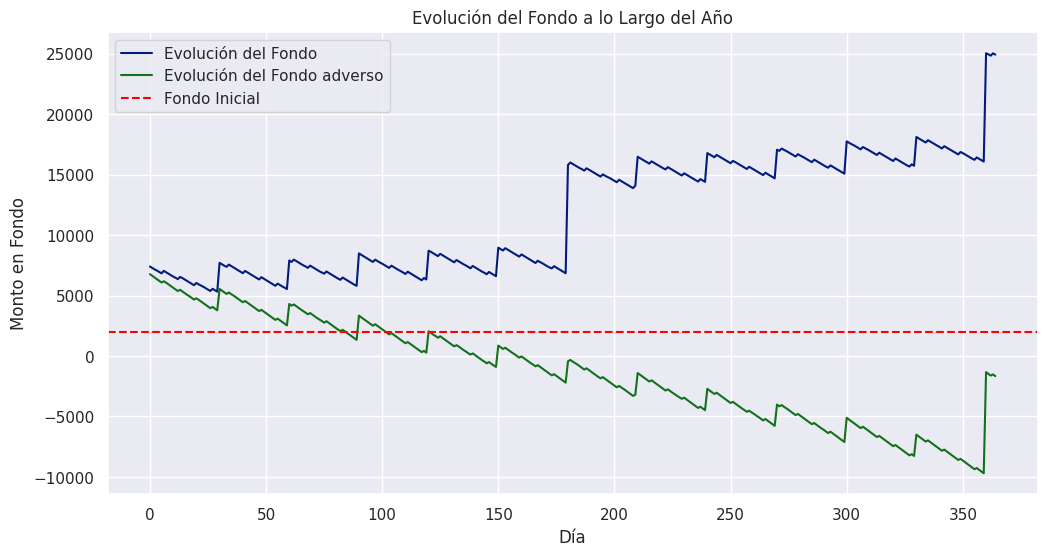

In [ ]:
es_base=sim(5000, eb_var)
es_adverso=sim(5000, ea_var)

eb_fondo = pd.DataFrame({'dias_anio': range(0,365),'ev_fondo': es_base})
ea_fondo = pd.DataFrame({'dias_anio': range(0,365),'ev_fondo': es_adverso})

sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=eb_fondo, color=sns.color_palette("dark")[0], label="Evolución del Fondo", x="dias_anio", y="ev_fondo")
sns.lineplot(data=ea_fondo, color=sns.color_palette("dark")[2], label="Evolución del Fondo adverso", x="dias_anio", y="ev_fondo")
#plt.plot(fondo_ev, color='blue', label="Evolución del Fondo")
plt.axhline(y=2000, color="red", linestyle='--', label="Fondo Inicial")
plt.title("Evolución del Fondo a lo Largo del Año")
plt.xlabel("Día")
plt.ylabel("Monto en Fondo")
plt.legend()
plt.grid("True")
plt.show()


In [ ]:
# GRAFICA DISTRIBUCION DE VARIABLES EN ESCENARIO BASE
def dist_var(variables):
  sns.set_theme(style="darkgrid")
  fig, axs=plt.subplots(4,2, figsize=(12, 8))

  sns.histplot(variables['aportaciones'], kde=True, color=sns.color_palette("dark")[4], ax=axs[0, 0])
  axs[0, 0].set_title('Distribución de Aportaciones')
  axs[0, 0].set_xlabel(' (MXN)')
  axs[0, 0].set_ylabel('Frecuencia')

  sns.histplot(variables['ap_sem'], kde=True, color=sns.color_palette("dark")[1], ax=axs[0, 1])
  axs[0, 1].set_title('Distribución de Aportaciones semanal')
  axs[0, 1].set_xlabel('(MXN)')
  axs[0, 1].set_ylabel('Frecuencia')

  sns.histplot(variables['rendimiento'], kde=True, color=sns.color_palette("dark")[2], ax=axs[1,0])
  axs[1, 0].set_title('Distribución de Rendimiento')
  axs[1, 0].set_xlabel('(MXN)')
  axs[1, 0].set_ylabel('Frecuencia')

  sns.histplot(variables['beca'], kde=True, color=sns.color_palette("dark")[2], ax=axs[1,1])
  axs[1, 1].set_title('Distribución de otorg. beca')
  axs[1, 1].set_xlabel('(MXN)')
  axs[1, 1].set_ylabel('Frecuencia')

  sns.histplot(variables['comida'], kde=True, color=sns.color_palette("dark")[3], ax=axs[2,0])
  axs[2, 0].set_title('Distribución de Gastos de comida')
  axs[2, 0].set_xlabel('(%)')
  axs[2, 0].set_ylabel('Frecuencia')

  sns.histplot(variables['tarjeta'], kde=True, color="teal", ax=axs[2,1])
  axs[2,1].set_title('Distribución de gastos de TDC')
  axs[2,1].set_xlabel('(MXN)')
  axs[2,1].set_ylabel('Frecuencia')

  sns.histplot(variables['otros'], kde=True, color="teal", ax=axs[3,0])
  axs[3,0].set_title('Distribución de otros gastos')
  axs[3,0].set_xlabel('(MXN)')
  axs[3,0].set_ylabel('Frecuencia')

  sns.histplot(variables['celular'], kde=True, color="teal", ax=axs[3,1])
  axs[3,1].set_title('Distribución de otros gastos celular')
  axs[3,1].set_xlabel('(MXN)')
  axs[3,1].set_ylabel('Frecuencia')


  plt.tight_layout()
  plt.savefig("histogramas.png", dpi=300, bbox_inches="tight")
  plt.show()
  return


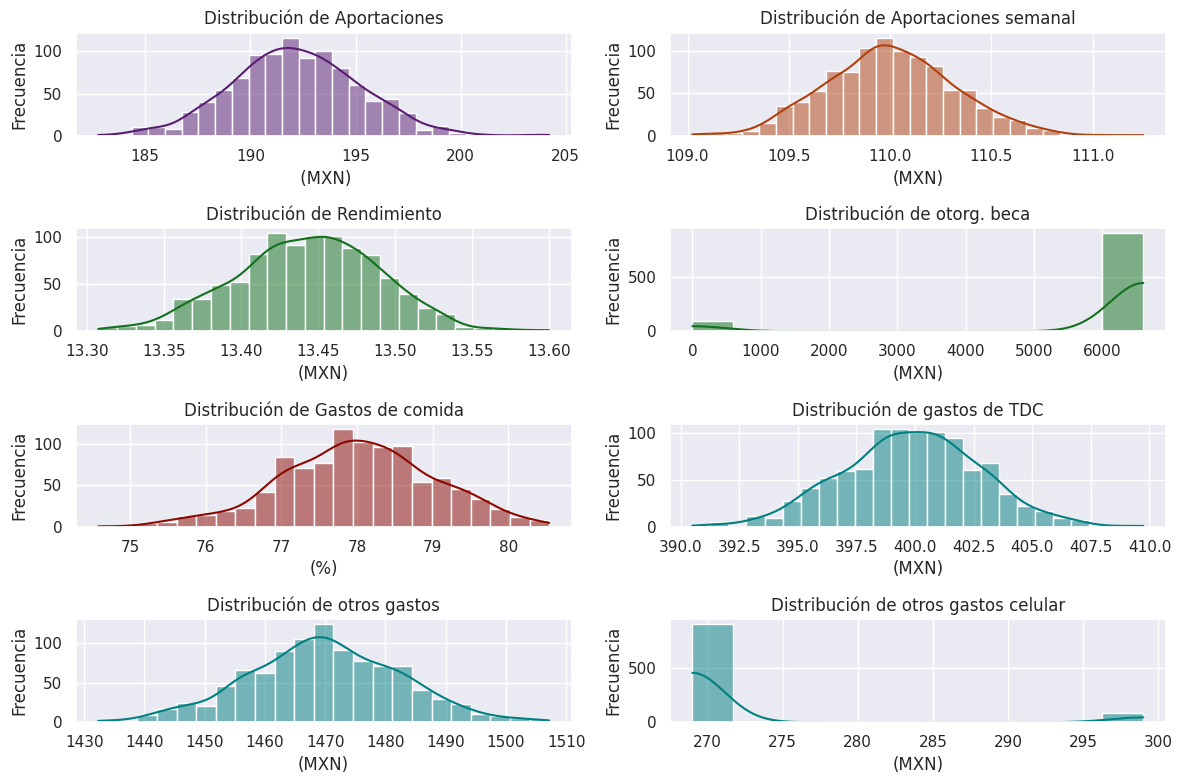

In [ ]:
dist_var(eb_var)

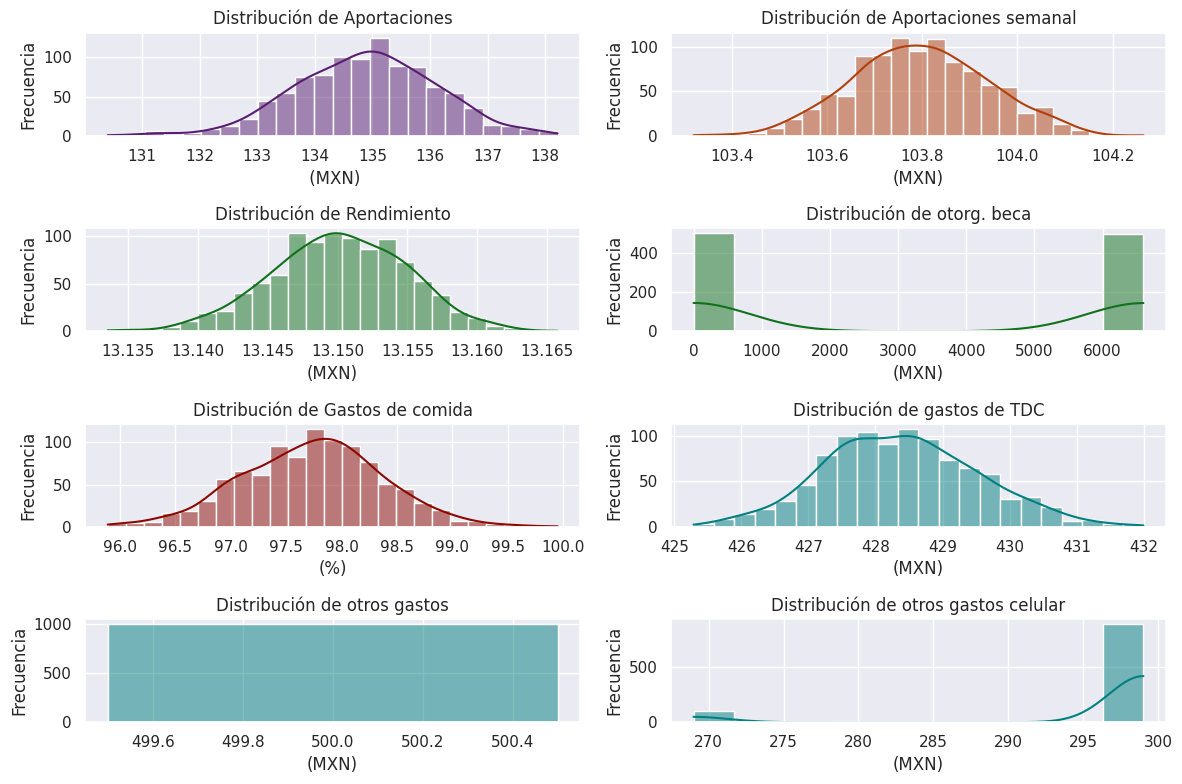

In [ ]:
dist_var(ea_var)

DEFINIR ESCENARIO BASE

Ingresos y gastos es condiciones normales (sin variciones)

DEFINIR ESCENARIO ADVERSO

Ingresos
 - La renta solo se cubre 6 meses
 - Las aportaciones solo subren los percentiles <25%
 - Los pasajes solo cubren los porcentiles <75%
 - No hay ingresos de beca
 - El rendimiento cubre el <25%

 - Los pasajes siempre son $42
 - Gasto del celular es binomial
 - Los gastos de comida cubren percentiles >75%
 - El gasto de Tdc cubre percentiles >75%
 - Otros gastos cubren percentiles >75%

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html


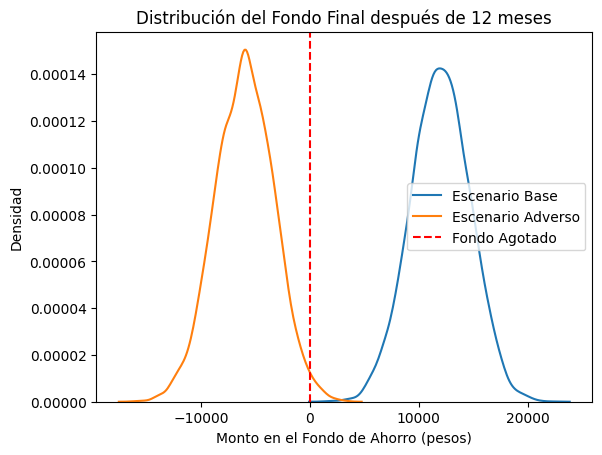

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir ingresos y gastos mensuales promedio y su desviación estándar (puedes ajustarlos)
ingresos_mensuales = 5000  # ejemplo en pesos
gastos_mensuales_base = 4000
gastos_mensuales_adverso = 5500
desviacion_ingresos = 500
desviacion_gastos = 600

# Configurar la cantidad de simulaciones y el tiempo en meses
simulaciones = 10000
meses = 12

# Crear listas para almacenar los resultados
fondo_final_base = []
fondo_final_adverso = []

# Simulación de Montecarlo
for _ in range(simulaciones):
    fondo_base, fondo_adverso = 0, 0

    for _ in range(meses):
        ingresos = np.random.normal(ingresos_mensuales, desviacion_ingresos)
        gastos_base = np.random.normal(gastos_mensuales_base, desviacion_gastos)
        gastos_adverso = np.random.normal(gastos_mensuales_adverso, desviacion_gastos)

        fondo_base += ingresos - gastos_base
        fondo_adverso += ingresos - gastos_adverso

    fondo_final_base.append(fondo_base)
    fondo_final_adverso.append(fondo_adverso)

# Visualización de los resultados
sns.kdeplot(fondo_final_base, label="Escenario Base")
sns.kdeplot(fondo_final_adverso, label="Escenario Adverso")
plt.axvline(0, color='red', linestyle='--', label="Fondo Agotado")
plt.title("Distribución del Fondo Final después de 12 meses")
plt.xlabel("Monto en el Fondo de Ahorro (pesos)")
plt.ylabel("Densidad")
plt.legend()
plt.show()
